# How We Like to Learn

- [GitHub Repository](https://github.com/denisecase/datafun-03-discussion)

## First Attempt

In this example, we do a quick look, and don't use the wordcloud package (as it is not on the allow list for Voila)

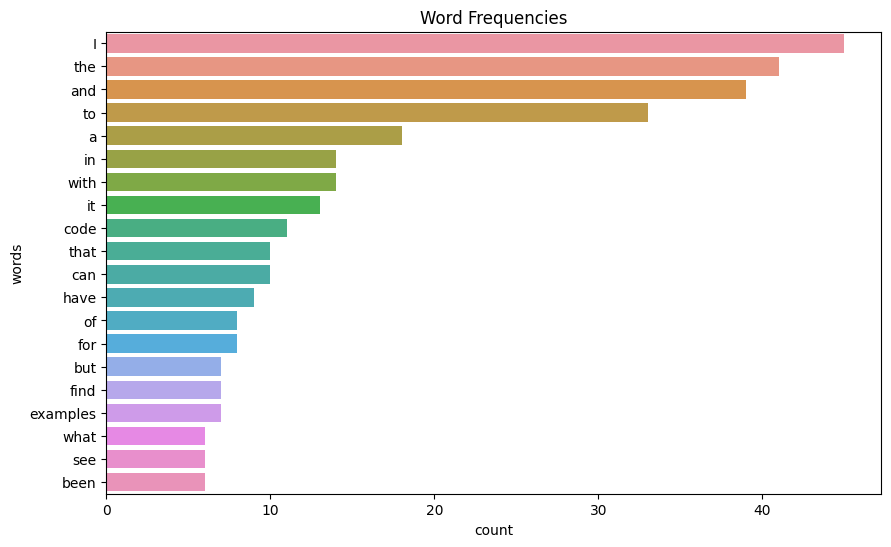

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read text from file
with open("data.txt", "r") as text_file:
    # Read the entire file into a single string
    long_string = text_file.read()

# Split the string into a list of words
word_list = long_string.split()

# Convert the word list into a DataFrame
df = pd.DataFrame({"words": word_list})

# Count the occurrences of each word
word_counts = df['words'].value_counts()

# Plot the frequencies using seaborn's barplot function
plt.figure(figsize=(10,6))
sns.barplot(x=word_counts[:20], y=word_counts.index[:20])
plt.title("Word Frequencies (First Attempt)")
plt.show()


## Improved Visualization

In this example, we use the list of "stop word" (words that are not useful for analysis) to improve the visualization. We get this and more from the nltk ("natural language toolkit") library.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
from ipywidgets import interact

# Read text from file
with open("data.txt", "r") as text_file:
    # Read the entire file into a single string
    long_string = text_file.read()

# Split the string into a list of words
word_list = long_string.split()

# Convert the word list into a DataFrame
df = pd.DataFrame({"words": word_list})

# If you want to add custom stopwords, you can add them to this list
stop_words = set(stopwords.words('english'))  # use the NLTK stopwords

# Add custom stopwords
stop_words.update(['I'])

# Filter out the stopwords using ~ for "not"
df = df[~df['words'].isin(stop_words)]

# Count the occurrences of each word
word_counts = df['words'].value_counts()


# Define a function that takes an integer input and plots the top n words
def plot_top_words(n):
    plt.figure(figsize=(10,6))
    sns.barplot(x=word_counts[:n], y=word_counts.index[:n])
    plt.title(f"Take 2: Top {n} Word Frequencies excluding stopwords")
    plt.show()


# Use ipywidgets to create an interactive slider for the function
# Pass in the function name without parentheses;
# we don't want to call the function, we just want to connect that logic to the slider.
interact(plot_top_words, n=(1, 30))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deniselive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_top_words(n)>